In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

In [16]:
class Product:
    INK = 'SQUID_INK'


In [17]:
prices = pd.concat([pd.read_csv(f'round4/prices_round_4_day_{i}.csv', sep=';') for i in range(1, 4)], ignore_index=True)
trades = pd.concat([pd.read_csv(f'round4/trades_round_4_day_{i}_nn.csv', sep=';') for i in range(1, 4)], ignore_index=True)
observations = []
for day in range(1, 4):
    odf = pd.read_csv(f'round4/observations_round_4_day_{day}.csv')
    odf['day'] = day
    observations.append(odf)
observations = pd.concat(observations, ignore_index=True)

In [18]:
ink = prices[prices['product'] == Product.INK].reset_index(drop=True).copy()
ink['time'] = ink['timestamp'] + (ink['day'] - 1) * 1_000_000

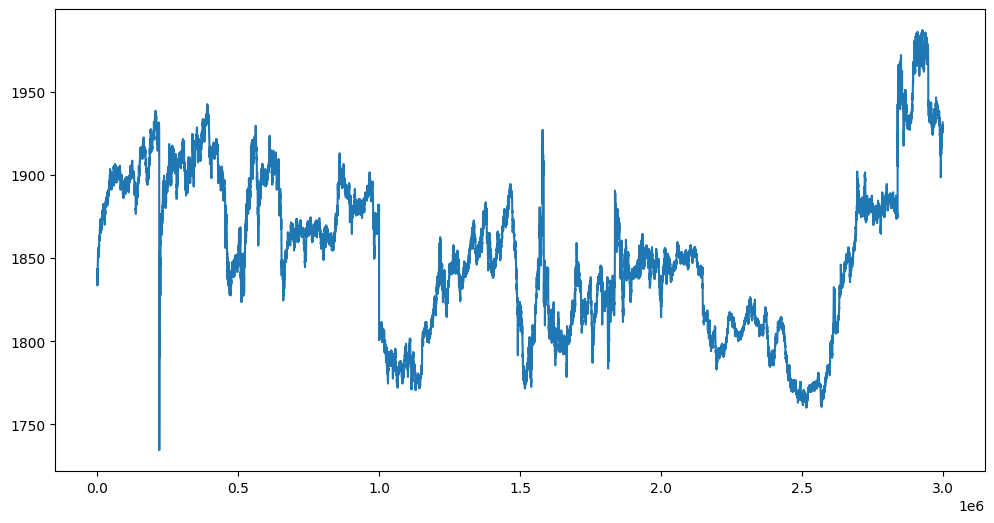

In [19]:
plt.figure(figsize=(12, 6))
plt.plot(ink['time'], ink['mid_price'])
plt.show()

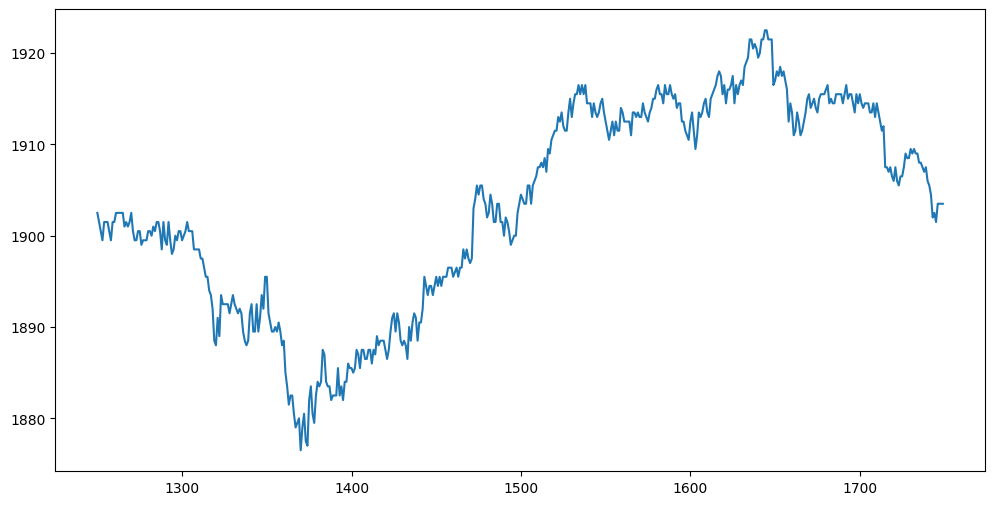

In [34]:
'''browse'''
# big spike window
data = ink[ink['day'] == 1].copy()
df = data.iloc[1250:1750]

# browse = ink.iloc[3000:10000]
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['mid_price'])
plt.show()

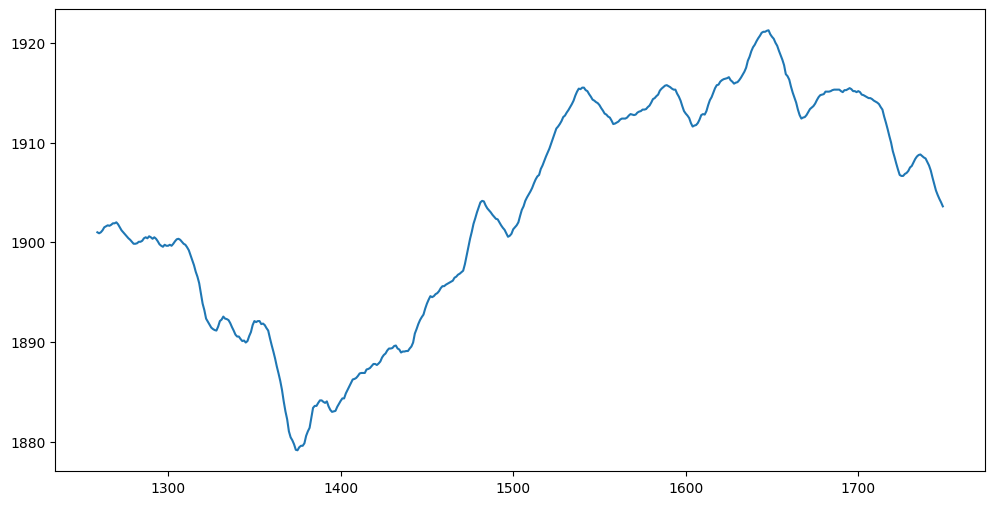

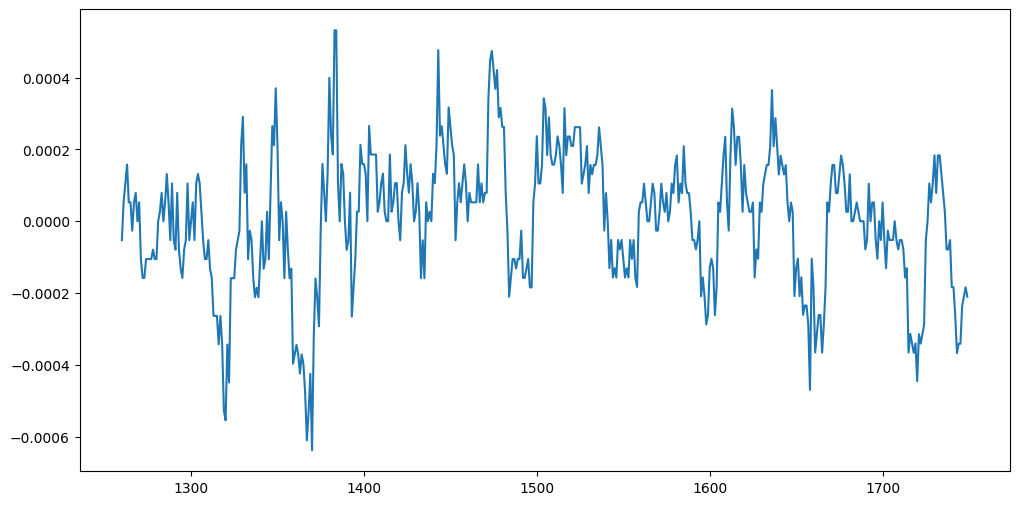

In [35]:
# browse = ink.iloc[3000:10000]
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['mid_price'].rolling(10).mean())
plt.show()

plt.figure(figsize=(12, 6))
# plt.plot(df.index, df['mid_price'].pct_change())
plt.plot(df.index, df['mid_price'].rolling(10).mean().pct_change())
plt.show()

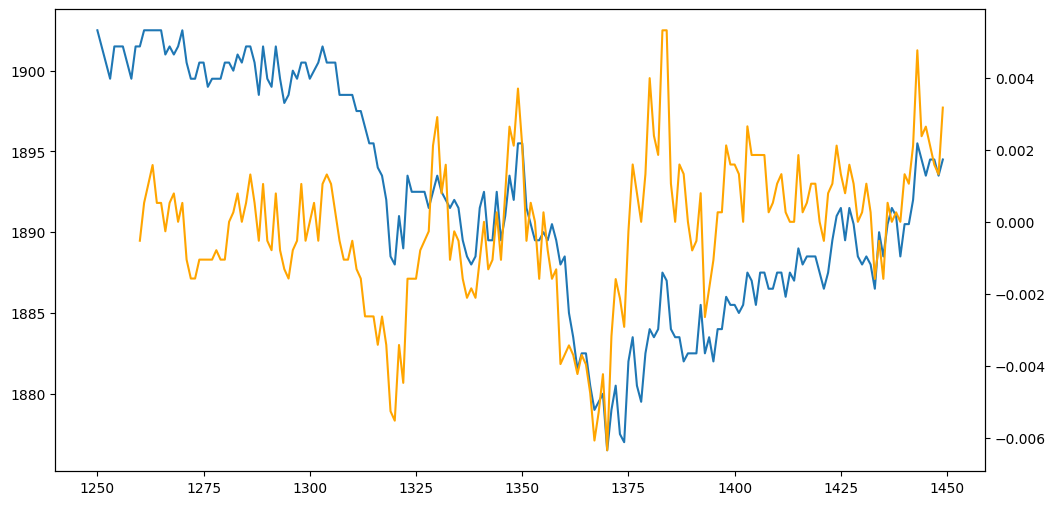

In [51]:
# browse = ink.iloc[3000:10000]
df = data.iloc[1250:1450]
# df = data.iloc[1250:1750]
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['mid_price'])
# plt.show()

# plt.figure(figsize=(12, 6))
# plt.plot(df.index, df['mid_price'].pct_change())
plt.twinx()
# plt.plot(df.index, df['mid_price'].pct_change(10).rolling(10).mean(), color='orange')
plt.plot(df.index, df['mid_price'].pct_change(10), color='orange')
plt.show()

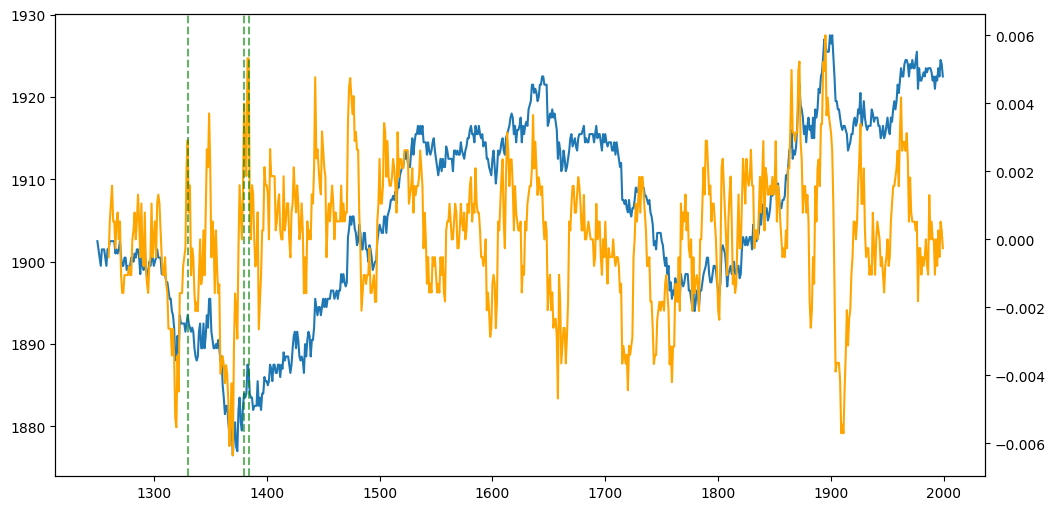

In [72]:
# df = data.iloc[1250:1450].copy()
df = data.iloc[1250:2000].copy()
pct_change_10 = df['mid_price'].pct_change(10)

# Find the inflection point where the pct_change goes from negative to positive
# TODO could also use threshold for abs value of pct change
# inflection_points = (pct_change_10.shift(1) < 0) & (pct_change_10 > 0) & (pct_change_10.abs() > 0.01)
# inflection_points = (pct_change_10.shift(1) < 0) & (pct_change_10 > 0) & (abs(pct_change_10 - pct_change_10.shift(1)) >= 0.008)
inflection_points = (pct_change_10.shift(10) < 0) & (pct_change_10 > 0) & (pct_change_10 - pct_change_10.shift(10) >= 0.008)
inflection_indices = df.index[inflection_points]

plt.figure(figsize=(12, 6))
plt.plot(df.index, df['mid_price'], label='Mid Price')

ax2 = plt.gca().twinx()
ax2.plot(df.index, pct_change_10, color='orange', label='10-step % Change')

# Plot vertical lines at inflection points
for idx in inflection_indices:
    plt.axvline(x=idx, color='green', linestyle='--', alpha=0.6)

plt.show()


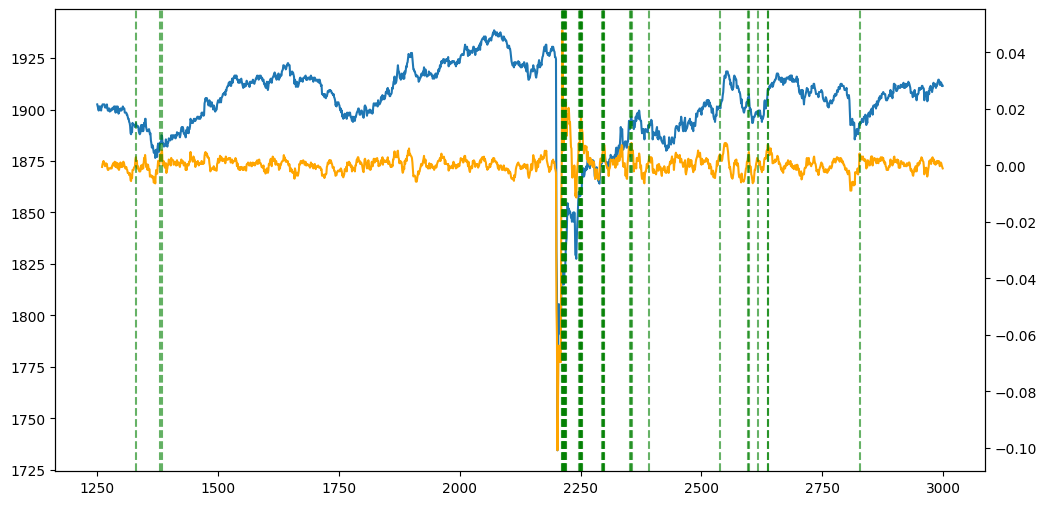

In [73]:
# df = data.iloc[1250:1450].copy()
df = data.iloc[1250:3000].copy()
pct_change_10 = df['mid_price'].pct_change(10)

# Find the inflection point where the pct_change goes from negative to positive
# TODO could also use threshold for abs value of pct change
# inflection_points = (pct_change_10.shift(1) < 0) & (pct_change_10 > 0) & (pct_change_10.abs() > 0.01)
# inflection_points = (pct_change_10.shift(1) < 0) & (pct_change_10 > 0) & (abs(pct_change_10 - pct_change_10.shift(1)) >= 0.008)
inflection_points = (pct_change_10.shift(10) < 0) & (pct_change_10 > 0) & (pct_change_10 - pct_change_10.shift(10) >= 0.008)
inflection_indices = df.index[inflection_points]

plt.figure(figsize=(12, 6))
plt.plot(df.index, df['mid_price'], label='Mid Price')

ax2 = plt.gca().twinx()
ax2.plot(df.index, pct_change_10, color='orange', label='10-step % Change')

# Plot vertical lines at inflection points
for idx in inflection_indices:
    plt.axvline(x=idx, color='green', linestyle='--', alpha=0.6)

plt.show()


In [21]:
velocity = df['mid_price'].diff()
acceleration = velocity.diff()

/var/folders/9p/y7yhf54d2yd5cdpt7hc80f2h0000gn/T/ipykernel_44414/1249112922.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['momentum'] = df['mid_price'].diff(lookback)
/var/folders/9p/y7yhf54d2yd5cdpt7hc80f2h0000gn/T/ipykernel_44414/1249112922.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['signal'] = np.where(df['momentum'] > threshold, 1,
/var/folders/9p/y7yhf54d2yd5cdpt7hc80f2h0000gn/T/ipykernel_44414/1249112922.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a s

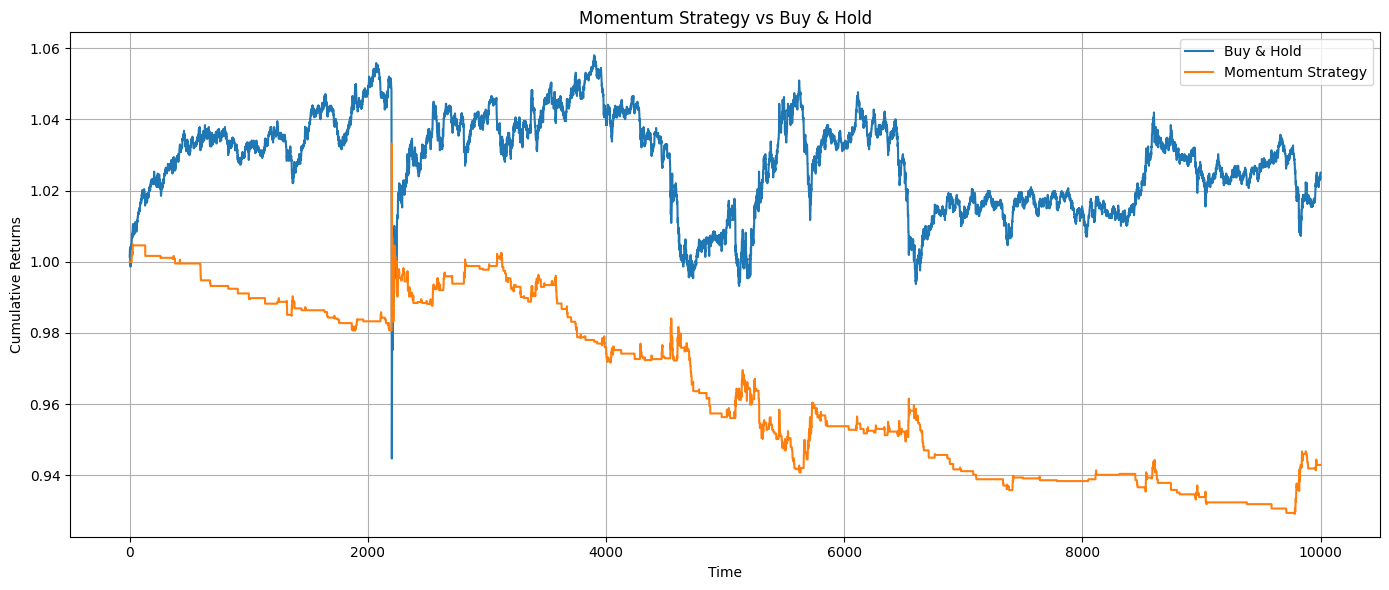

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# --- Momentum calculation ---
lookback = 10
df['momentum'] = df['mid_price'].diff(lookback)

# --- Create a simple momentum-based signal ---
threshold = df['momentum'].std()
df['signal'] = np.where(df['momentum'] > threshold, 1,
                        np.where(df['momentum'] < -threshold, -1, 0))

# --- Simulated strategy returns ---
df['returns'] = df['mid_price'].pct_change()
df['strategy_returns'] = df['signal'].shift(1) * df['returns']
df['cumulative_strategy'] = (1 + df['strategy_returns']).cumprod()
df['cumulative_returns'] = (1 + df['returns']).cumprod()

# --- Plotting ---
plt.figure(figsize=(14, 6))
plt.plot(df.index, df['cumulative_returns'], label='Buy & Hold')
plt.plot(df.index, df['cumulative_strategy'], label='Momentum Strategy')
plt.title("Momentum Strategy vs Buy & Hold")
plt.xlabel("Time")
plt.ylabel("Cumulative Returns")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


<Axes: >

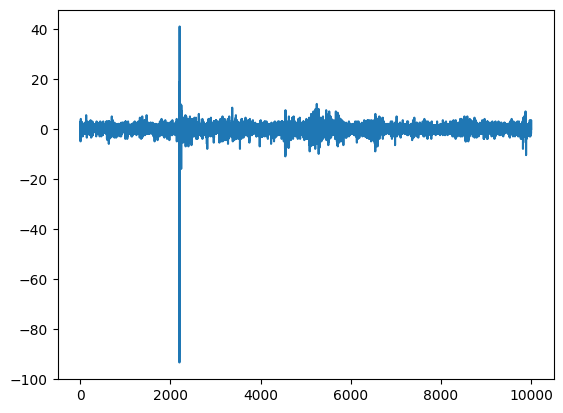

In [9]:
velocity.plot()

<Axes: >

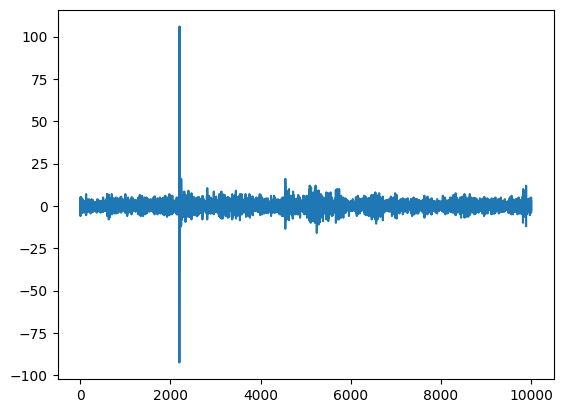

In [10]:
acceleration.plot()